In [3]:
import librosa
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy
import os


# Loading Data

In [68]:
def load_directory(directory):
    # List of subdirectories (labels)
    subdirectories = ["Hebron", "Nablus", "Jerusalem", "RamallahReef"]
    audio_list = []
    labels = []
    
    # Iterate through each subdirectory
    for subdir in subdirectories:
        # Get the full path of the subdirectory
        subdir_path = os.path.join(directory, subdir)

        # Iterate through each file in the subdirectory
        for filename in os.listdir(subdir_path):
            # Get the full path of the file
            file_path = os.path.join(subdir_path, filename)

            # Check if the path is a file
            if os.path.isfile(file_path):
                # Load the audio file
                audio, sr = librosa.load(file_path, sr=16_000)
                
                # Normalize the audio to have a maximum absolute value of 1.0
                audio = librosa.util.normalize(audio)
                
                # Append audio and label
                audio_list.append(audio)
                labels.append(subdir)
                
    # Find the maximum length of audio files
    max_length = max(len(audio) for audio in audio_list)
    
    # Pad all audio files to the maximum length
    padded_audios = np.array([np.pad(audio, (0, max_length - len(audio)), mode='constant') for audio in audio_list])
    
    return padded_audios, labels

In [69]:
training_voices, training_labels = load_directory(training_directory)
testing_voices, testing_labels = load_directory(testing_directory)

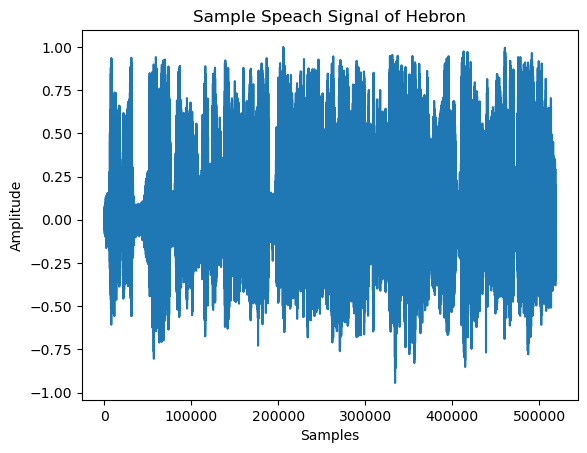

In [23]:
plt.figure()
plt.plot(training_voices[4])

plt.title(f'Sample Speach Signal of {training_labels[4]}')
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.show()

In [99]:
def frame_and_extract_features(audios, frame_size, hop_length, n_mfcc=13):
    all_features = []
    hamming_window = np.hamming(frame_size).reshape(1, -1)
    print(hamming_window.shape)
    
    for audio in audios:
        # Frame the audio signal
        frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length).copy().T
        frames = np.multiply(frames, hamming_window)
        
        # Extract MFCCs for each frame
        mfccs = []
        
        for frame in frames:
            mfcc = librosa.feature.mfcc(y=frame, sr=16000, n_mfcc=n_mfcc)
            mfccs.append(mfcc.mean(axis=1))  # Mean MFCC values across the frame

        mfccs = np.array(mfccs)
        all_features.append(mfccs)
    
    return np.array(all_features)

In [100]:
def get_frame_size(sampling_rate=16000, frame_duration=20): # 20 ms default frame_duration
    return int(sampling_rate * (frame_duration / 1000))

In [101]:
frame_size = get_frame_size()

# Extract feature vectors for each set
training_features = frame_and_extract_features(training_voices[[0]], frame_size, hop_length=int(frame_size//2))
testing_features = frame_and_extract_features(testing_voices[[0]], frame_size, hop_length=int(frame_size//2))

(1, 320)


KeyboardInterrupt: 

In [60]:
training_features

array([[[-2.2551907e+02, -1.6301392e+01,  8.1533089e+00, ...,
          2.9865017e+00,  2.3745332e+00, -3.5191220e-01],
        [-2.2678256e+02, -1.6996077e+01,  7.8095002e+00, ...,
          3.0008934e+00,  2.1083236e+00, -1.9993846e+00],
        [-2.2707059e+02, -1.7872866e+01,  6.1987772e+00, ...,
          1.9352970e+00,  1.8331531e+00, -1.9163859e+00],
        ...,
        [-2.2632381e+02, -1.6258591e+01,  6.0832186e+00, ...,
          2.7489300e+00,  2.0346289e+00,  9.4343340e-01],
        [-2.2562180e+02, -1.7075424e+01,  5.8140497e+00, ...,
          2.7626095e+00,  1.9156507e+00, -6.2323976e-02],
        [-2.2609439e+02, -1.7162544e+01,  7.0718002e+00, ...,
          2.9289174e+00,  2.3426242e+00, -4.2365193e-01]],

       [[-2.1016234e+02, -7.5756764e+00,  2.4061379e+00, ...,
         -2.0590894e+00, -1.0004169e+00,  1.9900080e+00],
        [-2.0964497e+02, -7.9210114e+00,  2.3404608e+00, ...,
         -2.6849067e+00, -2.6894712e+00,  3.4204027e-01],
        [-2.0891606e+02, 

In [10]:
frames, frame_size = frame_audio(audio, sr)

print(frames)
print(frames.shape)

[[ 0.          0.          0.         ...  0.00964355  0.00012207
  -0.00213623]
 [ 0.          0.          0.         ...  0.01071167  0.0012207
  -0.00219727]
 [ 0.          0.          0.         ...  0.01025391  0.00088501
  -0.00152588]
 ...
 [ 0.          0.          0.         ... -0.00296021  0.03701782
  -0.00549316]
 [ 0.          0.          0.         ... -0.0038147   0.0385437
  -0.00512695]
 [ 0.          0.          0.         ... -0.00216675  0.03881836
  -0.00476074]]
(882, 10141)


In [24]:
hamming_window = np.hamming(frame_size).reshape(-1, 1) # Column vector

NameError: name 'frame_size' is not defined

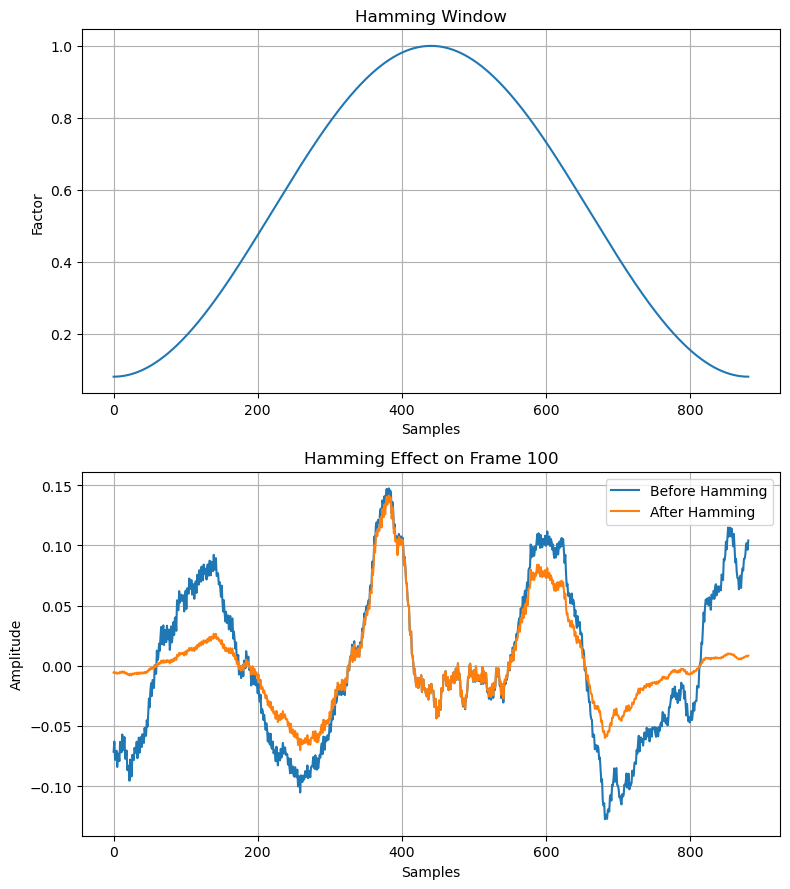

In [12]:
# Hamming window
plt.figure(figsize=(8, 9))

plt.subplot(2, 1, 1)
plt.plot(hamming_window)
plt.title('Hamming Window')
plt.xlabel('Samples')
plt.ylabel('Factor')
plt.grid(True)

# Hamming effect
plt.subplot(2, 1, 2)
plt.plot(frames[:, 100], label='Before Hamming')
plt.plot(frames[:, 100].reshape(-1, 1) * hamming_window, label='After Hamming')

plt.title('Hamming Effect on Frame 100')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
hammed_frames = frames * hamming_window
hammed_frames

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.71484375e-04,  9.76562500e-06, -1.70898438e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.57058905e-04,  9.76705305e-05, -1.75806955e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         8.20792319e-04,  7.08421942e-05, -1.22141714e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.36954926e-04,  2.96315799e-03, -4.39710171e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.05220408e-04,  3.08394700e-03, -4.10216228e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.73339844e-04,  3.10546875e-03, -3.80859375e-04]])

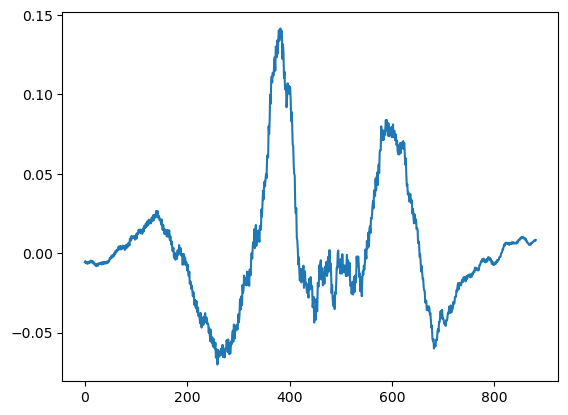

In [14]:
plt.plot(hammed_frames[:, 100])

In [15]:
energy = np.sum(frames**2, axis=0)
mean_energy = np.mean(energy)
std_energy = np.std(energy)

In [16]:
print(energy)
print('Mean Energy:', mean_energy)
print('Std Energy:', std_energy)

[0.         0.         0.         ... 0.06545363 0.12707762 0.20873412]
Mean Energy: 28.435757
Std Energy: 33.545277


In [17]:
arr = np.array([[1, 2, 3],
               [10, 20, 30]])

print(arr)
print(np.sum(arr, axis=0))
print(np.sum(arr, axis=1))

[[ 1  2  3]
 [10 20 30]]
[11 22 33]
[ 6 60]


In [18]:
np.log(len(audio)) / np.log(2)

22.092760688923878

In [19]:
# sd.play(audio, sr)
# sd.wait()